# Software Coaching for Python
# Week 5: Document Clustering & Topic Modeling

Instructor: Kang-Pyo Lee

In [14]:
from google.colab import drive

drive.mount('/content/drive')
path = "/content/drive/Shared drives/PythonCoaching_2023Summer"
my_folder = "ljw33083418"     # *** REPLACE WITH YOUR FOLDER NAME ***
outcome_folder = f"{path}/{my_folder}/outcome"
classdata_folder = f"{path}/classdata"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Install packages

In [21]:
! pip install --upgrade scikit-learn pyLDAvis==3.4.1
! pip3 install mxnet-mkl==1.6.0 numpy==1.23.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 70.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires numpy>=1.24.2, but you have numpy 1.23.1 which is incompatible.


## What Is a Corpus?

A corpus or text corpus is a large and structured set of texts. In corpus linguistics, they are used to do statistical analysis and hypothesis testing, checking occurrences or validating linguistic rules within a specific language territory.

Text Corpus: https://en.wikipedia.org/wiki/Text_corpus

In [2]:
corpus = ["Love, love me do. You know I love you. I'll always be true. So please. Love me do. Whoa, love me do.",
          "She loves you, yeah, yeah, yeah. She loves you, yeah, yeah, yeah. She loves you, yeah, yeah, yeah, yeah. You think you've lost your love. Well, I saw her yesterday. It's you she's thinkin' of. And she told me what to say.",
          "Can't buy me love, love. Can't buy me love. I'll buy you a diamond ring my friend. If it makes you feel alright. I'll get you anything my friend. If it makes you feel alright. 'Cause I don't care too much for money. For money can't buy me love.",
          "Love, love, love. Love, love, love. Love, love, love. There's nothin' you can do that can't be done. Nothin' you can sing that can't be sung. Nothin' you can say, but you can learn how to play the game. It's easy."]

corpus

["Love, love me do. You know I love you. I'll always be true. So please. Love me do. Whoa, love me do.",
 "She loves you, yeah, yeah, yeah. She loves you, yeah, yeah, yeah. She loves you, yeah, yeah, yeah, yeah. You think you've lost your love. Well, I saw her yesterday. It's you she's thinkin' of. And she told me what to say.",
 "Can't buy me love, love. Can't buy me love. I'll buy you a diamond ring my friend. If it makes you feel alright. I'll get you anything my friend. If it makes you feel alright. 'Cause I don't care too much for money. For money can't buy me love.",
 "Love, love, love. Love, love, love. Love, love, love. There's nothin' you can do that can't be done. Nothin' you can sing that can't be sung. Nothin' you can say, but you can learn how to play the game. It's easy."]

This corpus contains four documents and nine unique words, or terms.

In [3]:
len(corpus)

4

## What Is a Document-Term Matrix?

A document-term matrix (DTM) is a mathematical matrix that describes the frequency of terms that occur in a collection of documents. In a document-term matrix, rows correspond to documents in the collection and columns correspond to terms. There are various schemes for determining the value that each entry in the matrix should take.

Document-term matrix: https://en.wikipedia.org/wiki/Document-term_matrix

DTM is based on the "Bag-of-Words" model, where a text is simply represented as the bag of its words, disregarding grammar and even word order but only keeping multiplicity.
- Pros: Simple and easy to analyze.
- Cons: Grammar and order are lost.

Bag-of-words model: https://en.wikipedia.org/wiki/Bag-of-words_model

## What Is Term Frequency (TF)?

Term frequency (TF) is the number of times a term occurs in a document. Adjustments are often made to simple term frequency in the case where the lengh of documents varies greatly. In that case, we typically divide the raw term frequencies by the length of the document, i.e., the number of all terms in the document.

## Building a DTM with Term Frequencies

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
vectorizer = TfidfVectorizer(use_idf=False, norm=None)
vectorizer

TfidfVectorizer(norm=None, use_idf=False)

sklearn.feature_extraction.text.TfidfVectorizer: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

- `lowercase` (bool, default=True): Convert all characters to lowercase before tokenizing.

In [5]:
X = vectorizer.fit_transform(corpus)
X

<4x63 sparse matrix of type '<class 'numpy.float64'>'
	with 79 stored elements in Compressed Sparse Row format>

sklearn.feature_extraction.text.TfidfVectorizer.fit_transform: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer.fit_transform

From this point on, you can consider X the document-term matrix for `corpus`.

In [6]:
type(X)

scipy.sparse._csr.csr_matrix

In [7]:
X.shape

(4, 63)

X has 4 rows (i.e., 4 documents) and 63 columns (i.e., 63 terms).

In [8]:
X.toarray()

array([[ 0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         1.,  0.,  5.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  2.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  1.,  1.,  3.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  1.,  1.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
         1.,  0.,  0.,  1.,  1.,  1.,  0., 10.,  1.,  6.,  1.],
       [ 2.,  0.,  0.,  1.,  0.,  0.,  4.,  3.,  1.,  1.,  1.,  0.,  1.,
         0.,  0.,  2.,  2.,  2.,  0.,  1.,  0.,  0.,  2.,  2.,  0.,  0.,
         2.,  0.,  4.,  0.,  2.,  3.,  2.,  1.,  2.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  

In [9]:
vectorizer.get_feature_names_out()

array(['alright', 'always', 'and', 'anything', 'be', 'but', 'buy', 'can',
       'care', 'cause', 'diamond', 'do', 'don', 'done', 'easy', 'feel',
       'for', 'friend', 'game', 'get', 'her', 'how', 'if', 'it', 'know',
       'learn', 'll', 'lost', 'love', 'loves', 'makes', 'me', 'money',
       'much', 'my', 'nothin', 'of', 'play', 'please', 'ring', 'saw',
       'say', 'she', 'sing', 'so', 'sung', 'that', 'the', 'there',
       'think', 'thinkin', 'to', 'told', 'too', 'true', 've', 'well',
       'what', 'whoa', 'yeah', 'yesterday', 'you', 'your'], dtype=object)

sklearn.feature_extraction.text.TfidfVectorizer.get_feature_names_out: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer.get_feature_names_out

In [10]:
import pandas as pd

pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names_out(),
             index=["doc{}".format(i) for i in range(X.shape[0])])

,alright,always,and,anything,be,but,buy,can,care,cause,...,too,true,ve,well,what,whoa,yeah,yesterday,you,your
doc0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0
doc1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,10.0,1.0,6.0,1.0
doc2,2.0,0.0,0.0,1.0,0.0,0.0,4.0,3.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
doc3,0.0,0.0,0.0,0.0,2.0,1.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0


This document-term matrix is based on the bag-of-words model, so we have lost all the grammar and order of words. Only how many times each term occurs matters in this scheme.  

## Building a DTM with Binary Term Frequencies

In [11]:
vectorizer = TfidfVectorizer(binary=True, use_idf=False, norm=None)
X = vectorizer.fit_transform(corpus)

- `binary` (bool, default=False): If True, all non-zero term counts are set to 1.

In [12]:
pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names_out(),
             index=["doc{}".format(i) for i in range(X.shape[0])])

,alright,always,and,anything,be,but,buy,can,care,cause,...,too,true,ve,well,what,whoa,yeah,yesterday,you,your
doc0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
doc1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
doc2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
doc3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Whether or not each word appears in a document only matters, no matter how many times it appears.

## Building a DTM with Normalized Term Frequencies

It would be unfair to give more credit to longer documents with more terms. Normalization is used to get rid of the advantage of longer documents with possibly more terms.

In [13]:
vectorizer = TfidfVectorizer(use_idf=False, norm="l2") #l2로 normalization
X = vectorizer.fit_transform(corpus)

- `norm` ('l1', 'l2' or None, optional, default='l2')
    - 'l2': Sum of squares of vector elements is 1
    - 'l1': Sum of absolute values of vector elements is 1

In [14]:
pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names_out(),
             index=["doc{}".format(i) for i in range(X.shape[0])])

,alright,always,and,anything,be,but,buy,can,care,cause,...,too,true,ve,well,what,whoa,yeah,yesterday,you,your
doc0,0.000000,0.13484,0.000000,0.00000,0.13484,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.00000,0.13484,0.000000,0.000000,0.000000,0.13484,0.000000,0.000000,0.269680,0.000000
doc1,0.000000,0.00000,0.072932,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.00000,0.00000,0.072932,0.072932,0.072932,0.00000,0.729325,0.072932,0.437595,0.072932
doc2,0.186501,0.00000,0.000000,0.09325,0.00000,0.00000,0.373002,0.279751,0.09325,0.09325,...,0.09325,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.373002,0.000000
doc3,0.000000,0.00000,0.000000,0.00000,0.15570,0.07785,0.000000,0.467099,0.00000,0.00000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.311400,0.000000


## What Is TF-IDF?

Inverse document frequency (IDF) is an inverse function of the number of documents in which it occurs. For example, because the term *the* is so common in English, term frequency will tend to incorrectly emphasize documents which happen to use the word *the* more frequently, without giving enough weight to the more meaningful terms. Here, the term *the* is not a good keyword to distinguish relevant and non-relevant documents and terms. Hence, an inverse document frequency factor is incorporated which diminishes the weight of terms that occur very frequently in the document set and increases the weight of terms that occur rarely.

The TF-IDF is the product of two statistics, term frequency and inverse document frequency. There are various ways for determining the exact values of both statistics.

tf–idf: https://en.wikipedia.org/wiki/Tf%E2%80%93idf

## Building a DTM with TF-IDF

In [15]:
vectorizer = TfidfVectorizer(use_idf=True, norm="l2")
X = vectorizer.fit_transform(corpus)

- `use_idf` (bool, default=True): Enable inverse-document-frequency reweighting.

In [16]:
pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names_out(),
             index=["doc{}".format(i) for i in range(X.shape[0])])

,alright,always,and,anything,be,but,buy,can,care,cause,...,too,true,ve,well,what,whoa,yeah,yesterday,you,your
doc0,0.000000,0.202438,0.000000,0.000000,0.159604,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.202438,0.000000,0.000000,0.000000,0.202438,0.000000,0.000000,0.211281,0.000000
doc1,0.000000,0.000000,0.079272,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.079272,0.079272,0.079272,0.000000,0.792718,0.079272,0.248204,0.079272
doc2,0.224888,0.000000,0.000000,0.112444,0.000000,0.000000,0.449776,0.265956,0.112444,0.112444,...,0.112444,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.234712,0.000000
doc3,0.000000,0.000000,0.000000,0.000000,0.179056,0.113555,0.000000,0.537169,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.237031,0.000000


## Building a DTM with TF-IDF Removing English Stopwords

You may want no stopwords in English to be included in the DTM.

In [17]:
vectorizer = TfidfVectorizer(use_idf=True, norm="l2", stop_words="english")
X = vectorizer.fit_transform(corpus)

- `stop_words` (str {'english'}, list, or None, default=None)

In [18]:
pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names_out(),
             index=["doc{}".format(i) for i in range(X.shape[0])])

,alright,buy,care,cause,diamond,don,easy,feel,friend,game,...,sing,sung,think,thinkin,told,true,ve,whoa,yeah,yesterday
doc0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.309647,0.000000,0.309647,0.00000,0.000000
doc1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.00000,0.00000,0.092492,0.092492,0.092492,0.000000,0.092492,0.000000,0.92492,0.092492
doc2,0.289147,0.578294,0.144573,0.144573,0.144573,0.144573,0.00000,0.289147,0.289147,0.00000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
doc3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.16291,0.000000,0.000000,0.16291,...,0.16291,0.16291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


By removing English stopwords, 30 terms including *and*, *anything*, *be*, and *but* have disappeared in the DTM.

## Building a DTM with TF-IDF Removing Corpus-Specific Stopwords

While there are universal stopwords, there could be corpus-specific stopwords, which occur many times in a specific corpus.

In [19]:
vectorizer = TfidfVectorizer(use_idf=True, norm="l2", max_df=0.9)
X = vectorizer.fit_transform(corpus)

- `max_df` (float in range [0.0, 1.0] or int, default=1.0): When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold. For example, if `max_df` is set to 0.9, all terms that appear in over 90% of the documents will be excluded.  

In [20]:
pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names_out(),
             index=["doc{}".format(i) for i in range(X.shape[0])])

,alright,always,and,anything,be,but,buy,can,care,cause,...,told,too,true,ve,well,what,whoa,yeah,yesterday,your
doc0,0.000000,0.246152,0.000000,0.000000,0.194069,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.246152,0.000000,0.000000,0.000000,0.246152,0.000000,0.000000,0.000000
doc1,0.000000,0.000000,0.081907,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.081907,0.000000,0.000000,0.081907,0.081907,0.081907,0.000000,0.819073,0.081907,0.081907
doc2,0.238405,0.000000,0.000000,0.119202,0.000000,0.000000,0.476809,0.281941,0.119202,0.119202,...,0.000000,0.119202,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
doc3,0.000000,0.000000,0.000000,0.000000,0.220506,0.139842,0.000000,0.661517,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


By removing corpus-specific stopwords, two terms *love* and *you* have disappeared in the DTM.

#### The choice of which scheme to fill the document-term matrix depends on the data. We're going to use the last TF-IDF scheme considering corpus-specific stopwords in most cases.

## Loading Data

In [22]:
import pandas as pd
pd.set_option('display.max_colwidth', 150)

path = "/content/drive/Shared drives/PythonCoaching_2023Summer"
classdata_folder = f"{path}/classdata"
df = pd.read_csv(f"{classdata_folder}/html_data.csv", sep="\t")
df

,file_name,title,author,datetime,body
0,house-retirements-2024.html,What's Going On With House Retirements This Cycle?,Geoffrey Skelley,"Jul. 28, 2023, at 6:00 AM","2024 Election What's Going On With House Retirements This Cycle? By Geoffrey Skelley Jul. 28, 2023, at 6:00 AM ..."
1,americans-increasingly-against-abortion-limits.html,A Growing Share Of Americans Think States Shouldn't Be Able To Put Any Limits On Abortion,Amelia Thomson-DeVeaux,"Jul. 25, 2023, at 6:00 AM",Abortion A Growing Share Of Americans Think States Shouldn't Be Able To Put Any Limits On Abortion By Amelia Thomson-DeVeaux Ju...
2,who-would-win-if-trump-wasnt-in-the-gop-primary.html,Who Would Win If Trump Wasn’t In The GOP Primary?,NaN,"Jul. 25, 2023","It is widely believed that former President Donald Trump will be indicted for a third time in the coming days or weeks, as he received a target l..."
3,2024-dropout-draft.html,Which Republican Will Drop Out Of The 2024 Primary First?,NaN,"Jul. 26, 2023, at 6:00 AM","2024 Election Which Republican Will Drop Out Of The 2024 Primary First? A FiveThirtyEight Chat Jul. 26, 2023, at 6:00 AM ..."
4,republican-august-debate-qualifications.html,Six Republican Candidates Appear To Have Qualified For The August Debate,Geoffrey Skelley,"Jul. 24, 2023, at 2:20 PM","2024 Republican Debates Six Republican Candidates Appear To Have Qualified For The August Debate By Geoffrey Skelley Jul. 24, 2..."
...,...,...,...,...,...
1345,new-yorks-gerrymander-might-change-which-party-picks-up-seats-in-the-midterms.html,New York’s Gerrymander Might Change Which Party Picks Up Seats In The Midterms,Nathaniel Rakich,"Feb. 17, 2022","UPDATE (April 27, 2022, 4:50 p.m.): The congressional map discussed in this video has since been struck down by the New York Court of Appeals. Se..."
1346,nfl-teams-are-making-brian-floress-case-for-him.html,NFL Teams Are Making Brian Flores’s Case For Him,Neil Paine,"Feb. 17, 2022","The lawsuit brought against the NFL by former Miami Dolphins coach Brian Flores earlier this month is still in its early stages, and a lot of its..."
1347,russian-doping-isnt-the-only-problem-in-figure-skating.html,Russian Doping Isn’t The Only Problem In Figure Skating,Dvora Meyers,"Feb. 16, 2022",This article is part of our Beijing Olympics series. When 15-year-old Russian skater Kamila Valieva took to the ice Tuesday in her purple ch...
1348,giannis-antetokounmpo-is-committing-fewer-charges-but-hes-just-as-aggressive.html,Giannis Antetokounmpo Is Committing Fewer Charges. But He’s Just As Aggressive.,James L. Jackson,"Feb. 16, 2022","Giannis Antetokounmpo is usually a cool customer on the court. But during the 2020 NBA bubble, in a game against the Washington Wizards, his emot..."


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  1350 non-null   object
 1   title      1350 non-null   object
 2   author     1169 non-null   object
 3   datetime   1349 non-null   object
 4   body       1350 non-null   object
dtypes: object(5)
memory usage: 52.9+ KB


In [24]:
df = df.dropna(subset=["title"]) # title 비어있는 row 제거
df

,file_name,title,author,datetime,body
0,house-retirements-2024.html,What's Going On With House Retirements This Cycle?,Geoffrey Skelley,"Jul. 28, 2023, at 6:00 AM","2024 Election What's Going On With House Retirements This Cycle? By Geoffrey Skelley Jul. 28, 2023, at 6:00 AM ..."
1,americans-increasingly-against-abortion-limits.html,A Growing Share Of Americans Think States Shouldn't Be Able To Put Any Limits On Abortion,Amelia Thomson-DeVeaux,"Jul. 25, 2023, at 6:00 AM",Abortion A Growing Share Of Americans Think States Shouldn't Be Able To Put Any Limits On Abortion By Amelia Thomson-DeVeaux Ju...
2,who-would-win-if-trump-wasnt-in-the-gop-primary.html,Who Would Win If Trump Wasn’t In The GOP Primary?,NaN,"Jul. 25, 2023","It is widely believed that former President Donald Trump will be indicted for a third time in the coming days or weeks, as he received a target l..."
3,2024-dropout-draft.html,Which Republican Will Drop Out Of The 2024 Primary First?,NaN,"Jul. 26, 2023, at 6:00 AM","2024 Election Which Republican Will Drop Out Of The 2024 Primary First? A FiveThirtyEight Chat Jul. 26, 2023, at 6:00 AM ..."
4,republican-august-debate-qualifications.html,Six Republican Candidates Appear To Have Qualified For The August Debate,Geoffrey Skelley,"Jul. 24, 2023, at 2:20 PM","2024 Republican Debates Six Republican Candidates Appear To Have Qualified For The August Debate By Geoffrey Skelley Jul. 24, 2..."
...,...,...,...,...,...
1345,new-yorks-gerrymander-might-change-which-party-picks-up-seats-in-the-midterms.html,New York’s Gerrymander Might Change Which Party Picks Up Seats In The Midterms,Nathaniel Rakich,"Feb. 17, 2022","UPDATE (April 27, 2022, 4:50 p.m.): The congressional map discussed in this video has since been struck down by the New York Court of Appeals. Se..."
1346,nfl-teams-are-making-brian-floress-case-for-him.html,NFL Teams Are Making Brian Flores’s Case For Him,Neil Paine,"Feb. 17, 2022","The lawsuit brought against the NFL by former Miami Dolphins coach Brian Flores earlier this month is still in its early stages, and a lot of its..."
1347,russian-doping-isnt-the-only-problem-in-figure-skating.html,Russian Doping Isn’t The Only Problem In Figure Skating,Dvora Meyers,"Feb. 16, 2022",This article is part of our Beijing Olympics series. When 15-year-old Russian skater Kamila Valieva took to the ice Tuesday in her purple ch...
1348,giannis-antetokounmpo-is-committing-fewer-charges-but-hes-just-as-aggressive.html,Giannis Antetokounmpo Is Committing Fewer Charges. But He’s Just As Aggressive.,James L. Jackson,"Feb. 16, 2022","Giannis Antetokounmpo is usually a cool customer on the court. But during the 2020 NBA bubble, in a game against the Washington Wizards, his emot..."


## Setting the Goal

Our goal is to build a <b>clustering</b> model that is able to find clusters of similar tweets.
- Feature variables: words in web pages
- Records          : documents (web pages)

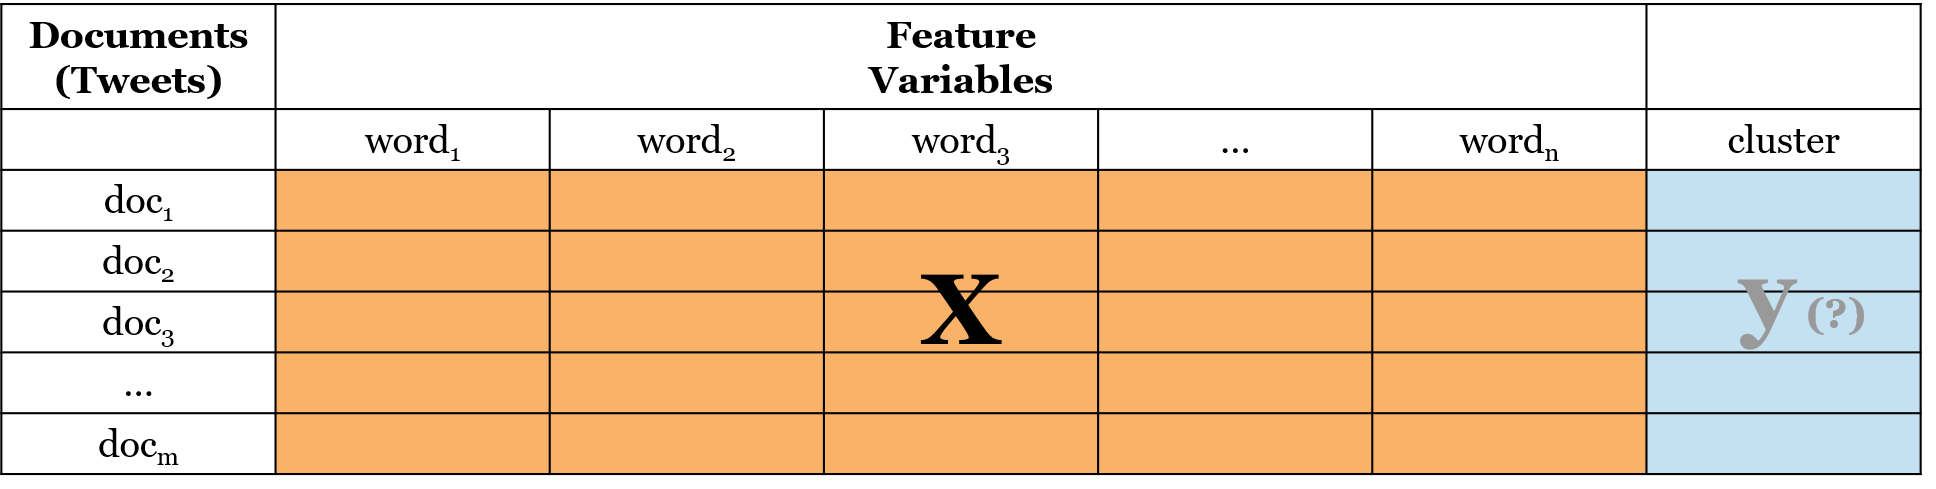

In [25]:
from IPython.display import Image

Image(f"{classdata_folder}/images/clustering.png")

## Preparing Data for Modeling

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=True, norm="l2", stop_words="english", max_df=0.7)
X = vectorizer.fit_transform(df.title)

The words in the document-term matrix are used as features of the model and the documents are used as individual records of the model. Recall that there is no `y`, or the outcome variable, in unsupervised learning. Note also that we do not split the dataset into a training set and a test set in unsupervised learning.  

In [27]:
X.shape

(1350, 2606)

There are 1,350 documents, or records, and 2,606 words, or features.

## K-Means Clustering

### Step 1. Choose the number of clusters

In [28]:
k = 5

### Step 2. Initialize a model object for k-means clustering

In [29]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k, random_state=0)
kmeans

KMeans(n_clusters=5, random_state=0)

sklearn.cluster.KMeans: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

### Step 3. Fit the model using the input data

In [30]:
%time kmeans.fit(X)

CPU times: user 82.4 ms, sys: 9.96 ms, total: 92.3 ms
Wall time: 139 ms


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=0)

### Step 4. Examine the clustering outcome

The focus of this step should be on identifying the characteristics of each cluster.

In [31]:
kmeans.cluster_centers_

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00145071, 0.00039959, 0.00238309, ..., 0.00051738, 0.00075031,
        0.00043608],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00227935, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [32]:
kmeans.cluster_centers_.shape

(5, 2606)

Each value in the `kmeans.cluster_centers_` array is the coordinates of a centroid in a multi-dimensional space with about 16,500 dimensions.

In [33]:
kmeans.labels_

array([1, 4, 1, ..., 1, 1, 1], dtype=int32)

In [34]:
df["cluster"] = kmeans.labels_

In [35]:
df[["title", "cluster"]]

,title,cluster
0,What's Going On With House Retirements This Cycle?,1
1,A Growing Share Of Americans Think States Shouldn't Be Able To Put Any Limits On Abortion,4
2,Who Would Win If Trump Wasn’t In The GOP Primary?,1
3,Which Republican Will Drop Out Of The 2024 Primary First?,1
4,Six Republican Candidates Appear To Have Qualified For The August Debate,1
...,...,...
1345,New York’s Gerrymander Might Change Which Party Picks Up Seats In The Midterms,0
1346,NFL Teams Are Making Brian Flores’s Case For Him,1
1347,Russian Doping Isn’t The Only Problem In Figure Skating,1
1348,Giannis Antetokounmpo Is Committing Fewer Charges. But He’s Just As Aggressive.,1


In [36]:
df.cluster.value_counts()

cluster
1    1035
4     160
0      89
2      38
3      28
Name: count, dtype: int64

Note that k-means clustering neither names the clusters nor gives any additional information about the clusters. It just yields cluster labels in numbers. It is you to identify each cluster.  

In [37]:
cluster_1st, cluster_2nd, cluster_3rd, cluster_4th, cluster_5th = df.cluster.value_counts().index

In [38]:
df[df.cluster == cluster_1st].sample(10, random_state=0)[["title", "cluster"]]          # the largest cluster

,title,cluster
830,Where Americans Stand On Trump’s Legal Jeopardy,1
388,"Kevin McCarthy Is Speaker, But He’s Got A Tough Job Ahead",1
1178,MLB's Best Players Didn't Win Much Last Year. This Year Could Be Different.,1
389,Will Wild-Card Weekend Give Us The Upsets We Crave?,1
523,Can Raphael Warnock Pull Off Another Senate Runoff?,1
1017,What Ireland's Past Can Tell Us About A Post-Roe America,1
349,"Meet Lewin Díaz, Baseball's Biggest Hot-Potato Prospect",1
369,The Freedom Caucus Was Designed To Disrupt,1
271,How Mario Lemieux Beat Cancer — And Started A Comeback For The Ages,1
1030,Elena Delle Donne Has Picked Up Where She Left Off,1


In [39]:
df[df.cluster == cluster_2nd].sample(10, random_state=0)[["title", "cluster"]]          # the second largest cluster

,title,cluster
836,How Democrats And Republicans Think Differently About Crime And Gun Violence,4
839,Democrats Have A Lot Riding On The Inflation Reduction Act,4
1072,The Real Dividing Line On Abortion,4
90,A Special Election In Ohio Shows Voters Still Care About Abortion,4
439,Democrats Want To Put Abortion On The Ballot — But Many States Won’t Let Them,4
780,Meet 6 Democrats Of Color Who Want To See Their Party Change,4
895,The Abortion Vote In Kansas Looks Like It’s Going To Be Close,4
568,Voters Will Decide The Future Of Abortion Rights In Michigan,4
692,Democrats Need More Than Beto O’Rourke If They Want To Flip Texas,4
694,Do Democrats And Republicans Agree On Anything About Climate Change And Immigration?,4


In [40]:
import nltk
nltk.download(['punkt', 'averaged_perceptron_tagger', 'stopwords'])

df["words"] = df.title.apply(lambda x: nltk.word_tokenize(x))
df["tagged_words"] = df.words.apply(lambda x: nltk.pos_tag(x))

import string
global_stopwords = nltk.corpus.stopwords.words("english")
local_stopwords = [c for c in string.punctuation] + ['‘', '’', '—', '…', "'s", "n't", "'re", "could"]

from collections import Counter

def get_counter(dataframe, stopwords=[]):
    counter = Counter()

    for l in dataframe.tagged_words:
        word_set = set()

        for t in l:
            word = t[0].lower()
            tag = t[1]

            if word not in stopwords:
                word_set.add(word)

        counter.update(word_set)

    return counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [41]:
counter_1st = get_counter(df[df.cluster == cluster_1st], global_stopwords+local_stopwords)
counter_1st.most_common(30)

[('americans', 71),
 ('trump', 64),
 ('win', 49),
 ('election', 49),
 ('biden', 39),
 ('republican', 36),
 ('2024', 33),
 ('2022', 33),
 ('voters', 32),
 ('senate', 30),
 ('primary', 28),
 ('gop', 28),
 ('year', 28),
 ('watch', 27),
 ('nba', 26),
 ('still', 24),
 ('might', 24),
 ('georgia', 24),
 ('candidates', 23),
 ('world', 23),
 ('want', 23),
 ('make', 22),
 ('big', 22),
 ('college', 20),
 ('us', 19),
 ('political', 19),
 ('like', 19),
 ('nfl', 19),
 ('even', 19),
 ('politics', 19)]

In [42]:
counter_2nd = get_counter(df[df.cluster == cluster_2nd], global_stopwords+local_stopwords)
counter_2nd.most_common(30)

[('abortion', 61),
 ('democrats', 61),
 ('republicans', 48),
 ('senate', 20),
 ('americans', 11),
 ('2024', 11),
 ('rights', 11),
 ('house', 11),
 ('win', 10),
 ('midterms', 9),
 ('voters', 8),
 ('states', 7),
 ('new', 7),
 ('biden', 7),
 ('access', 7),
 ('think', 6),
 ('control', 6),
 ('want', 6),
 ('ohio', 5),
 ('ballot', 5),
 ('might', 5),
 ('trump', 5),
 ('primary', 5),
 ('black', 5),
 ('nevada', 5),
 ('polls', 5),
 ('get', 4),
 ('first', 4),
 ('carolina', 4),
 ('voted', 4)]

## LDA Topic Modeling

## Setting the Goal

Our goal is to build a <b>topic</b> model that is able to find abstract topics in the tweets.
- Feature variables: words in web pages
- Records          : documents (web pages)

### Step 1. Choose the number of topics

In [43]:
num_topics = 5

### Step 2. Initialize a model object for LDA topic modeling

In [44]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

lda = LDA(n_components=num_topics, random_state=0)     # LDA uses randomness to get a probability distribution
lda

LatentDirichletAllocation(n_components=5, random_state=0)

sklearn.decomposition.LatentDirichletAllocation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html

### Step 3. Fit the model using the input data

In [45]:
%time lda.fit(X)

CPU times: user 1.78 s, sys: 8.02 ms, total: 1.78 s
Wall time: 1.82 s


LatentDirichletAllocation(n_components=5, random_state=0)

### Step 4. Examine the output of topic modeling

In [46]:
lda.components_

array([[0.55511655, 0.20002975, 0.94814613, ..., 0.73538345, 0.567534  ,
        0.20002451],
       [0.91409581, 0.20002092, 0.97666767, ..., 0.20002422, 0.60891328,
        0.65125361],
       [0.20007619, 0.20002061, 0.2000471 , ..., 0.20002162, 0.20003884,
        0.20002198],
       [0.6531374 , 0.61348318, 0.20006055, ..., 0.20002608, 0.20003895,
        0.20002109],
       [0.54375056, 0.20002133, 1.14157421, ..., 0.20003524, 0.20004442,
        0.20002211]])

In [47]:
lda.components_.shape

(5, 2606)

In [48]:
def show_topics(model, feature_names, num_top_words):
    for topic_idx, topic_scores in enumerate(model.components_):
        print("*** Topic {}:".format(topic_idx))
        print(" + ".join(["{:.2f} * {}".format(topic_scores[i], feature_names[i]) for i in topic_scores.argsort()[::-1][:num_top_words]]))
        print()

In [49]:
show_topics(lda, vectorizer.get_feature_names_out(), 10)

*** Topic 0:
5.30 * american + 5.20 * americans + 4.56 * basketball + 4.52 * covid + 4.31 * 19 + 4.23 * primary + 4.15 * voters + 3.94 * biden + 3.87 * abortion + 3.71 * run

*** Topic 1:
11.16 * court + 10.76 * supreme + 9.08 * abortion + 7.10 * americans + 7.06 * democrats + 6.40 * know + 5.18 * senate + 4.73 * need + 4.54 * control + 4.33 * want

*** Topic 2:
18.21 * week + 17.29 * looking + 16.75 * datasets + 13.78 * trump + 9.96 * election + 7.28 * 2024 + 7.14 * republicans + 7.13 * win + 6.37 * indictment + 5.23 * republican

*** Topic 3:
9.71 * 2022 + 7.79 * watch + 6.73 * win + 6.14 * election + 5.70 * primaries + 4.90 * republicans + 4.65 * gop + 4.47 * primary + 4.12 * candidates + 4.12 * republican

*** Topic 4:
5.94 * americans + 5.60 * democrats + 4.72 * abortion + 4.11 * world + 4.10 * nfl + 4.08 * jan + 3.55 * rights + 3.43 * football + 3.41 * biden + 3.38 * elections



Note that, just like k-means clustering, LDA topic modeling does not name the topics. It is up to you to identify each topic with its contributing words.  

### Topic Model Visualization

In [50]:
import pyLDAvis
import pyLDAvis.lda_model

pyLDAvis.enable_notebook()

pyLDAvis: https://github.com/bmabey/pyLDAvis

In [51]:
pyLDAvis.lda_model.prepare(lda, X, vectorizer)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.098791  0.023491       1        1  21.838246
3     -0.002544 -0.077130       2        1  21.245415
1      0.038056  0.048590       3        1  19.608208
0      0.034767  0.020995       4        1  18.829623
4      0.028512 -0.015946       5        1  18.478508, topic_info=          Term       Freq      Total Category  logprob  loglift
2539      week  10.000000  10.000000  Default  30.0000  30.0000
1377   looking  10.000000  10.000000  Default  29.0000  29.0000
577   datasets   9.000000   9.000000  Default  28.0000  28.0000
534      court   7.000000   7.000000  Default  27.0000  27.0000
2261   supreme   6.000000   6.000000  Default  26.0000  26.0000
...        ...        ...        ...      ...      ...      ...
1517       mlb   1.291103   4.587658   Topic5  -6.1037   0.4207
2328     think   1.283166   4.908954   Topic5  -6.1098   0.3468
250        big   1.284897   5.468324   Topic5  -6.1085   0.2403
1555       nba   1.266980   6.177054   Topic5  -6.1225   0.1044
1898    really   1.228300   4.453621   Topic5  -6.1535   0.4005

[317 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
3         2  0.794601    100
14        3  0.897942  1800s
16        4  0.700916     19
23        1  0.576206   2020
23        2  0.576206   2020
...     ...       ...    ...
2593      3  0.294431   year
2593      4  0.147215   year
2593      5  0.147215   year
2599      3  0.381263  young
2599      4  0.381263  young

[442 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 1, 5])

- Saliency: a measure of how much the term tells you about the topic.
- Relevance: a weighted average of the probability of the word given the topic and the word given the topic normalized by the probability of the topic.
- Bubble size: the importance of the topics, relative to the data.